In [1]:
import pandas as pd
from fuzzywuzzy import fuzz
import numpy as np

c:\Users\chacon1\AppData\Local\Programs\Python\Python39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
# 254 - General Farms, Primarily Crop
states = ['IA', 'OK', 'MO', 'OK', 'AL', 'LA', 'MS', 'IL', 'IN', 'OH', 'KY', 'TN', 'AR', 'NC', 'SC', 'GA']
FILEPATH = "../data/code_254.csv"
df = pd.read_csv(FILEPATH)

In [14]:
df.head()

,Unnamed: 0,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,...,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
1,5326,HASSELBACH MEATS,4637 OAK HARBOR RD,FREMONT,OH,43420,9373.0,143,419,2,...,7,960900,2,41.441192,-83.134802,P,23380,1.0,534,39143
2,6850,MURRAY CABINETRY LUXURY & BATH,407 N BLOOMINGTON ST,STREATOR,IL,61364,2201.0,99,815,2,...,7,963900,4,41.125039,-88.835096,P,36837,1.0,176,17099
3,11380,COOTERS FARM,1784 TUCK WILKES RD,NOXAPATER,MS,39346,9311.0,159,662,2,...,3,950200,4,33.011665,-89.126923,P,0,NaN,0,28159
5,15246,MODERNFOLD,215 W NEW RD,GREENFIELD,IN,46140,1095.0,59,317,2,...,7,410400,5,39.813328,-85.774158,P,26900,2.0,294,18059
6,20763,SHELFGENIE OF SAVANNAH,77 FORDING CT,BLUFFTON,SC,29910,9583.0,13,615,2,...,7,2103,2,32.263876,-80.928000,P,25940,2.0,0,45013


In [6]:
# trim out irrelevant states
df = df[df['STATE'].isin(states)]
df['STATE'].unique()

array(['OH', 'IL', 'MS', 'IN', 'SC', 'NC', 'TN', 'MO', 'GA', 'OK', 'LA',
       'AL', 'IA', 'KY', 'AR'], dtype=object)

<Axes: title={'center': 'Number of SIC Code 254 by State'}, xlabel='STATE', ylabel='Count'>

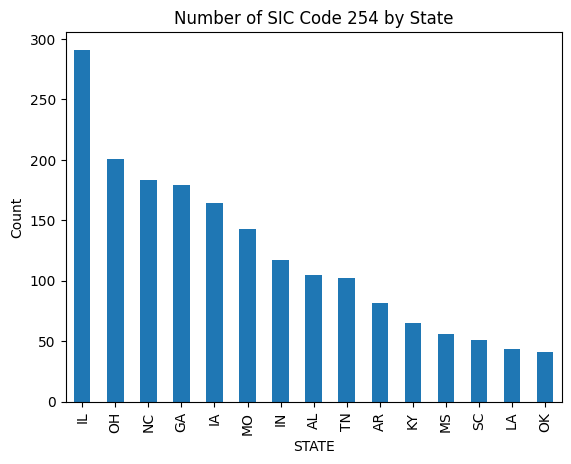

In [25]:
df['STATE'].value_counts().plot(kind='bar', ylabel="Count", title="Number of SIC Code 254 by State")

In [8]:
df['SIC6_DESCRIPTIONS'].value_counts()

SIC6_DESCRIPTIONS
POULTRY FARMS                              403
CHILD CARE SERVICE                         129
POULTRY PROCESSING PLANTS (MFRS)            87
FAMILY & CHILDREN SERVICES                  71
CLINICS                                     71
                                          ... 
GAMES TOYS & CHILDREN'S VEHICLES (MFRS)      1
MODEL MAKERS (MFRS)                          1
TOILET PARTITIONS                            1
EMPLOYEES SUGGESTION SYSTEM                  1
RESTAURANT EQUIPMENT & SUPPLIES-MFRS         1
Name: count, Length: 315, dtype: int64

In [22]:
# filter out SIC6_DESCRIPTIONS that are irrelvant 

# new dataframe that will contains the filtered set
df_filter = pd.DataFrame(columns=df.columns)

# remove anything containing a label that only appears less than x amount of times
x = 28
temp_series = df["SIC6_DESCRIPTIONS"].value_counts()[df["SIC6_DESCRIPTIONS"].value_counts() < x]

# extract the labels from the series created above, these are the labels that we will be removing
# put them into a list
temp_labels = temp_series.index
temp_label_list = temp_labels.tolist()

# after printing the output at the end, I came back and added label manually taht I wanted to remove
temp_label_list += ['CHILD CARE SERVICE', 'FAMILY & CHILDREN SERVICES', 'CLINICS', 'COUNTER TOPS-MANUFACTURERS', 'CABINETS-MANUFACTURERS',
                    'DISPLAY FIXTURES & MATERIALS-MFRS', 'STORE FIXTURES-MANUFACTURERS', 'OFFICE & STORE FIXTURES-WOOD (MFRS)',
                    'SHELVING-MANUFACTURERS']    
   

# create new dataframe df_filter that does NOT contain the above undesired labels
for i in range(len(df)):
    if df.iloc[i]["SIC6_DESCRIPTIONS"] in temp_label_list:
        # print(df.iloc[i]["SIC6_DESCRIPTIONS"])
        continue
    else:
        df_filter.loc[len(df_filter.index)] = df.iloc[i] # adding it to the new DataFrame

In [23]:
df_filter['SIC6_DESCRIPTIONS'].value_counts()

SIC6_DESCRIPTIONS
POULTRY FARMS                       403
POULTRY PROCESSING PLANTS (MFRS)     87
FARMS                                28
Name: count, dtype: int64

<Axes: title={'center': 'Number of SIC Code 254 by State'}, xlabel='STATE', ylabel='Count'>

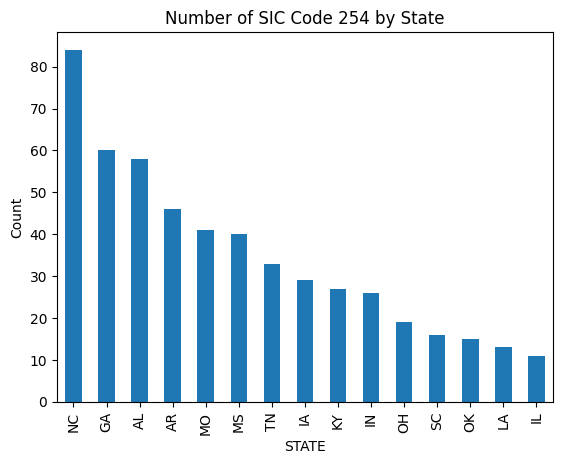

In [26]:
df_filter['STATE'].value_counts().plot(kind='bar', ylabel="Count", title="Number of SIC Code 254 by State")